<a href="https://colab.research.google.com/github/visiont3lab/data-visualization/blob/master/courses/02_Pandas/Pandas_Esercizio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Riassunto Libreria Pandas

In [0]:
# importare libreria pandas con nome pd
import pandas as pd

In [0]:
# Creare dataframe (usando struttura dizionario chiave-valore)
content ={
    "Nome": ["Manuel", "Giada", "Marco", "Manuel"],
    "Età" : ["26", "25", "28", "29"],
    "Sesso": ["M", "F", "M", "F"],
    "Stipendio": [2050,1900,2100,2300]
}
df = pd.DataFrame(content)
# Ê possibile specificare anche gli indici in modo che siano diversi da 0,1,2 --N
#df = pd.DataFrame(content, index=["n1","n2","n3","n4"])
df

In [0]:
# Elencare informazioni
df.info()

In [0]:
# Elencare informazioni statistiche utili
display(df.describe())
df["Età"]=pd.to_numeric(df["Età"])
display(df.describe())

In [0]:
# Elencare nome colonne
df.keys()

In [0]:
# Dimensione tabella (righe,colonne)
df.shape
row = df.shape[0]
col = df.shape[1]
print(df.shape,row,col)

In [0]:
# Ottenere prime  3 e ultime 3 righe della tabella
display(df.head(3)) # prime 3
display(df.tail(3)) # ultime 3

In [0]:
# Seleziona colonna Nome e Sesso
df[["Nome","Sesso"]]

In [0]:
# Seleziona colonna Nome e Sesso parole unique
display(df["Nome"].unique())
display(df["Sesso"].unique())

In [0]:
# Seleziona riga con indice 2 (qua si guarda agli indici)
display(df.loc[2])

In [0]:
# Seleziona riga numero 2 (si parte a contare da 0)
display(df.iloc[2])
# Seleziona riga numero 2,3 (si parte a contare da 0)
display(df.iloc[[2,3]])
# Seleziona riga da 1 a 3 
display(df.iloc[1:4])

In [0]:
# Della colonna Nome e Sesso selezionare le righe  1 e 3
df[["Nome","Sesso"]].iloc[[1,3]]

In [0]:
# Della colonna Nome e Sesso selezionare le righe da 1 a 3
df[["Nome","Sesso"]].iloc[1:4] # se vogliamo anche il 3 compreso dobbiamo arrivare a 4

In [0]:
# Seleziona tutte righe dove la colonna Sesso è uguale a F
display(df[df["Sesso"]=="F"])
# Seleziona l'indice della prima riga dove la colonna Sesso è uguale a F
display(df[df["Sesso"]=="F"].index[1])

In [0]:
# Seleziona tutte le righe dove la colonna età è > 26
df[df["Età"]>26] # Attenzione "26" è una stringa

In [0]:
# Seleziona tutte le righe dove la colonna età è > 26
df[df["Età"]>26] # Attenzione 26 è un numero adesso

In [0]:
# Plot 
#df.plot(kind="bar",stacked=True,figsize=(18,8)) # Grafico uno sopra l'latro
#df.plot(kind="bar",stacked=False,figsize=(18,8)) # Grafico a bar uno di fianco all'altro
df.plot(kind="line",figsize=(18,8)) # Grafico a bar uno di fianco all'altro
#df.set_index("Sesso").plot(kind="line",y=["Età"])

In [0]:
# Salvare dataframe come csv
df.to_csv('nome.csv', index=False,sep=',') # specificare se si vuole o no salvare l'indice
# Consiglio alcune volte è meglio usare ; come separatore. Vecchi excel funzionano meglio.

In [0]:
# Leggere csv file e convertirlo in dataframe
data = pd.read_csv('nome.csv')
data

In [0]:
# Salvare dataframe su excel
df.to_excel('nome.xlsx', index=False)

In [0]:
# Leggere excel file e convertirlo in dataframe
data = pd.read_excel('nome.xlsx')
data

In [0]:
# Ordinare tabella specificando una colonna e l'ordine crescente/decrescente
df = df.sort_values(by="Età", ascending=True) # crescente
display(df)
df.sort_values(by="Età",ascending=False, inplace=True) # decrescente
df

In [0]:
# Resettare l'ordine degli indici
df.reset_index(inplace=True)
df

In [0]:
# Aggiungere una colonna alla fine
df["Nuova Colonna"] = ["a","b","c","d"] # numero di elementi = numero di righe
# Aggiungere una colonna in una precisa posizione
df.insert(3, "Nuova Colonna 2", ["aa","bb","cc","dd"]) 
display(df)

In [0]:
# Rimuovere una colonna usando i nomi delle colonne
df.drop(columns=["Nuova Colonna 2", "Nuova Colonna"], inplace=True)
df

In [0]:
# Rimuovere righe 0 e 2 in base agli indici
df.drop(index=[0,2],inplace=True)
df

In [0]:
# Operazioni con stringhe: replace (sostituire)
df["Nome"].str.replace("a",",")
#df["Nome"] = df["Nome"].str.replace("e",",") # assegnamento
#df

In [0]:
# Operazione con stringhe: contains (contine)
# Nella colonna Nome e Sesso trova tutti i valori con  le lettere F o M mauscole
#df[df["Nome"].str.contains("F|M") | df["Sesso"].str.contains("M")]
# Nella colonna Nome e Sesso trova tutti i valori con  le lettere G e F mauscole
df[df["Nome"].str.contains("G") & df["Sesso"].str.contains("F")]

## Esercizio

### Descrizione

Datasets:
* dati_province = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"
* dati_regioni = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
* dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

Obbiettivo: Utilizzando i dati provinciali analizzare l'andamento dei contagiati nella propria provincia nel tempo.

1. Plottare l'andamento nel tempo dei contagiati della propria provincia. 
2. Comparare l'andamento nel tempo dei contagiati delle prime 3 provincie della nostra regione (Emilia-Romagna) con quelli  di una provincia appartenente sempre alla nostra regione.
3. Creare un grafico a torta con le percentuali di contagiati per ogni provincia apparente alla nostra regione (Emilia-Romagna) 


### Parte 1. Plottare l'andamento nel tempo dei contagiati della propria provincia. 

In [4]:
import pandas as pd
# Leggiamo i dati
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5883,2020-04-09T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,1906,NaN,NaN
5884,2020-04-09T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,1751,NaN,NaN
5885,2020-04-09T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,3049,NaN,NaN
5886,2020-04-09T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,1885,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5888 entries, 0 to 5887
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   data                     5888 non-null   object 
 1   stato                    5888 non-null   object 
 2   codice_regione           5888 non-null   int64  
 3   denominazione_regione    5888 non-null   object 
 4   codice_provincia         5888 non-null   int64  
 5   denominazione_provincia  5888 non-null   object 
 6   sigla_provincia          4876 non-null   object 
 7   lat                      5888 non-null   float64
 8   long                     5888 non-null   float64
 9   totale_casi              5888 non-null   int64  
 10  note_it                  4 non-null      object 
 11  note_en                  4 non-null      object 
dtypes: float64(2), int64(3), object(7)
memory usage: 552.1+ KB


In [6]:
# Estrarre i nomi delle regioni
df["denominazione_regione"].unique()
#list(df["denominazione_regione"].unique())

array(['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
       'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [7]:
# Estrarre i nomi delle provincie e manipolazione liste
mylist = list(df["denominazione_provincia"].unique())
print(mylist)
el = "In fase di definizione/aggiornamento"	
if el in mylist:
    print("Yes: e l'indice `e", mylist.index(el))
else:
    print("No")

['Chieti', "L'Aquila", 'Pescara', 'Teramo', 'In fase di definizione/aggiornamento', 'Matera', 'Potenza', 'Bolzano', 'Catanzaro', 'Cosenza', 'Crotone', 'Reggio di Calabria', 'Vibo Valentia', 'Avellino', 'Benevento', 'Caserta', 'Napoli', 'Salerno', 'Bologna', 'Ferrara', 'Forlì-Cesena', 'Modena', 'Parma', 'Piacenza', 'Ravenna', "Reggio nell'Emilia", 'Rimini', 'Gorizia', 'Pordenone', 'Trieste', 'Udine', 'Frosinone', 'Latina', 'Rieti', 'Roma', 'Viterbo', 'Genova', 'Imperia', 'La Spezia', 'Savona', 'Bergamo', 'Brescia', 'Como', 'Cremona', 'Lecco', 'Lodi', 'Mantova', 'Milano', 'Monza e della Brianza', 'Pavia', 'Sondrio', 'Varese', 'Ancona', 'Ascoli Piceno', 'Fermo', 'Macerata', 'Pesaro e Urbino', 'Campobasso', 'Isernia', 'Alessandria', 'Asti', 'Biella', 'Cuneo', 'Novara', 'Torino', 'Verbano-Cusio-Ossola', 'Vercelli', 'Bari', 'Barletta-Andria-Trani', 'Brindisi', 'Foggia', 'Lecce', 'Taranto', 'Cagliari', 'Nuoro', 'Oristano', 'Sassari', 'Sud Sardegna', 'Agrigento', 'Caltanissetta', 'Catania', 'E

In [9]:
#Estrarre le provincie in Emilia Romagna
df[df["denominazione_regione"]=="Emilia-Romagna"]["denominazione_provincia"].unique()

array(['Bologna', 'Ferrara', 'Forlì-Cesena', 'Modena', 'Parma',
       'Piacenza', 'Ravenna', "Reggio nell'Emilia", 'Rimini',
       'In fase di definizione/aggiornamento'], dtype=object)

In [8]:
# Creaiamo un dataframe che contiene solo la regione Emilia Romagna e la pronvincia Bologna
prov_list = ["Bologna", "Rimini", "Parma"] 
df_choice = df[ (df["denominazione_regione"]=="Emilia-Romagna") & (df["denominazione_provincia"]==prov_list[0])]
df_choice.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
22,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN,NaN
150,2020-02-25T18:00:00,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN,NaN
278,2020-02-26T18:00:00,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN,NaN
406,2020-02-27T18:00:00,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN,NaN
534,2020-02-28T18:00:00,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN,NaN


In [10]:
# Guardiamo il tipo dei dati 
# Controlliamo se i numeri sono interi o float
df_choice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 22 to 5782
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   data                     46 non-null     object 
 1   stato                    46 non-null     object 
 2   codice_regione           46 non-null     int64  
 3   denominazione_regione    46 non-null     object 
 4   codice_provincia         46 non-null     int64  
 5   denominazione_provincia  46 non-null     object 
 6   sigla_provincia          46 non-null     object 
 7   lat                      46 non-null     float64
 8   long                     46 non-null     float64
 9   totale_casi              46 non-null     int64  
 10  note_it                  0 non-null      object 
 11  note_en                  0 non-null      object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.7+ KB


In [11]:
# Convertiamo il tipo data in datetime e manipoliamola
temp = pd.to_datetime(df_choice["data"])
df_choice["data"] = temp.dt.date
print(temp.head(1))
print(temp.head(1).dt.date)
print(temp.head(1).dt.year)
print(temp.head(1).dt.strftime('%m-%d'))

22   2020-02-24 18:00:00
Name: data, dtype: datetime64[ns]
22    2020-02-24
Name: data, dtype: object
22    2020
Name: data, dtype: int64
22    02-24
Name: data, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Pandas Plot (Matplotlib based) Customization

* [Reference Pandas Data Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
* [Refrence Pandas Dataframe Plot Api](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
* [Matplotlib Style](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html)
* [Matplotlib plot Documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html)
* [Matplotlib Customize Rc Params](https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html)
* [Matplotlib Axes Api](https://matplotlib.org/3.2.1/api/axes_api.html)


In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import os
%matplotlib inline

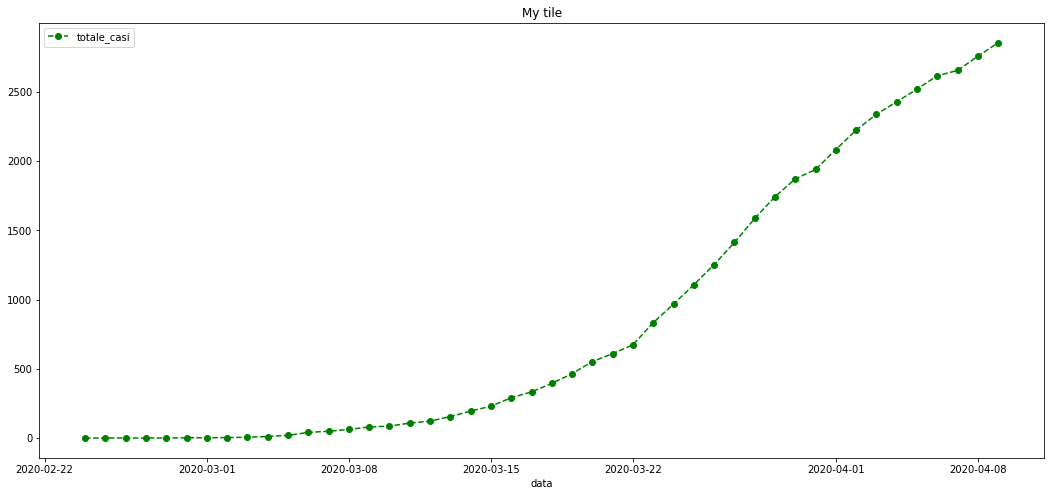

In [16]:
 # Parametri customizzazzione visualizzazione usando pandas
 ax = df_choice.set_index("data").plot(y="totale_casi",kind="line",    
                                    title="My tile",
                                    figsize=(18,8),
                                    grid=False,
                                    style="o--g") # '-', '--', '-.', ':'] fmt = '[marker][line][color]'
                                    #legend=True,fontsize=20, rot=30,
                                     

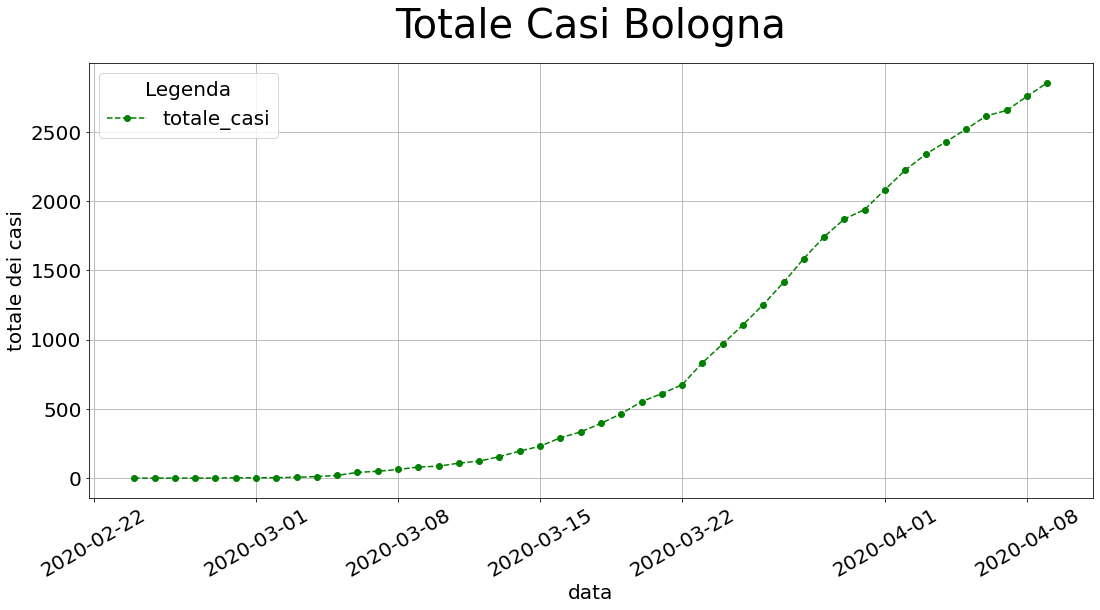

In [17]:
 # Parametri customizzazzione visualizzazione usando pandas
 ax = df_choice.set_index("data").plot(y="totale_casi",kind="line",    
                                    title="My tile",
                                    figsize=(18,8),
                                    grid=True, 
                                    legend=True,fontsize=20, rot=30,
                                    style="o--g") # '-', '--', '-.', ':'] fmt = '[marker][line][color]'

ax.set_title('Totale Casi Bologna', color="black", fontsize='40',pad=25)
ax.set_xlabel('data', color='black',fontsize='20')
ax.set_ylabel('totale dei casi', color='black',fontsize='20')
ax.legend(loc='best',fontsize=20, title="Legenda", title_fontsize=20)


In [18]:
#plt.style.use('ggplot')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [0]:
 # Parametri customizzazzione visualizzazione usando pandas
for el in plt.style.available:
    with plt.style.context(el):
        df_choice.set_index("data").plot(y="totale_casi",kind="line",title="My title: " + el)

In [0]:
df_final = df_choice[["data","totale_casi"]]

findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.
findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.


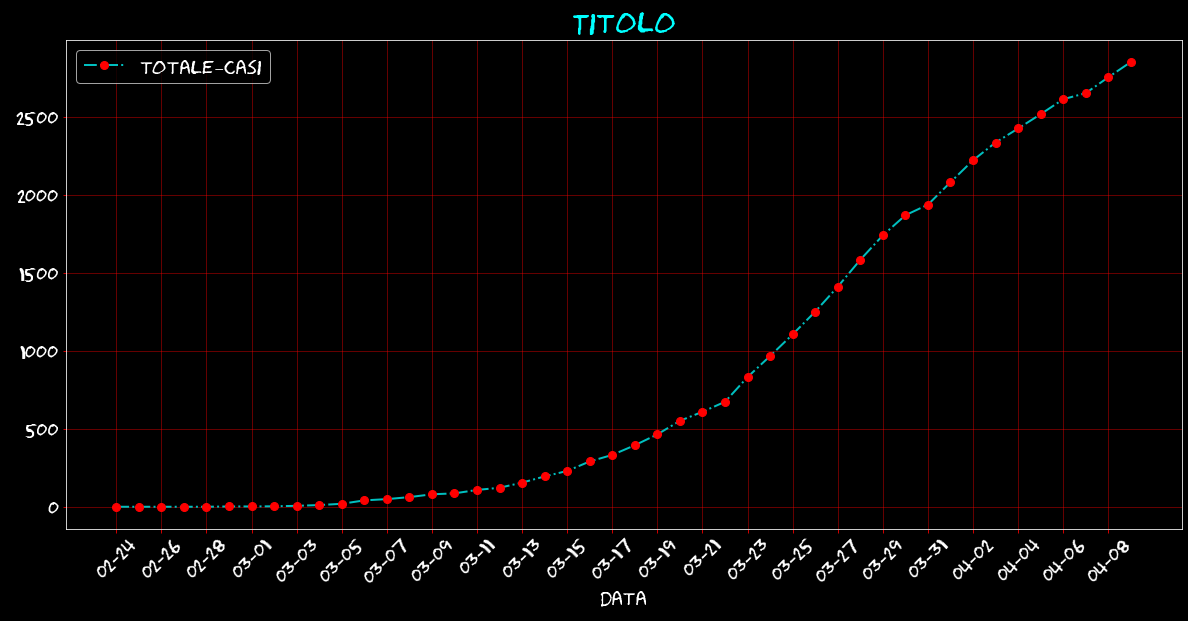

In [22]:
with plt.style.context('dark_background'):
    #df_final.plot(x="data", y="totale_casi",kind="line")
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.linestyle'] = '-.'
    plt.rc('lines', marker='o', markerfacecolor='r', markersize=8, markeredgecolor="r")
    #plt.rc('lines', linewidth=2, color='red',linestyle='-.')
    plt.rcParams['axes.prop_cycle'] = cycler(color=['c', 'g', 'b', 'y']) # color line
    plt.rcParams['figure.figsize'] = (20,9)
    plt.rc("axes",titlesize=30, titlecolor="cyan",titlepad=10)
    plt.rcParams.update({"axes.grid" : True, "grid.color": "red", "grid.alpha" : 0.5})
    plt.rc("font", family="fantasy", fantasy="Comic Neue", size=20)
    plt.rcParams["date.autoformatter.day"]= "%m-%d" #"%Y-%m"
    # Sample half element of a series
    xlist = []
    data_list = list(df_final['data'])
    for i in range(0, len(data_list),2):
        xlist.append(data_list[i])
    ax = df_final.set_index("data").plot(y="totale_casi",kind="line", title="Titolo", xticks=xlist)
    ax.tick_params(axis='x',labelrotation=45) #,labelcolor='orange',
    #ax.yaxis.grid(False)

    directory = "assets/images/"
    if not os.path.exists(directory):
        os.makedirs(directory)
    plt.savefig(directory+ "ex1.png")

#### Matplotlib plot

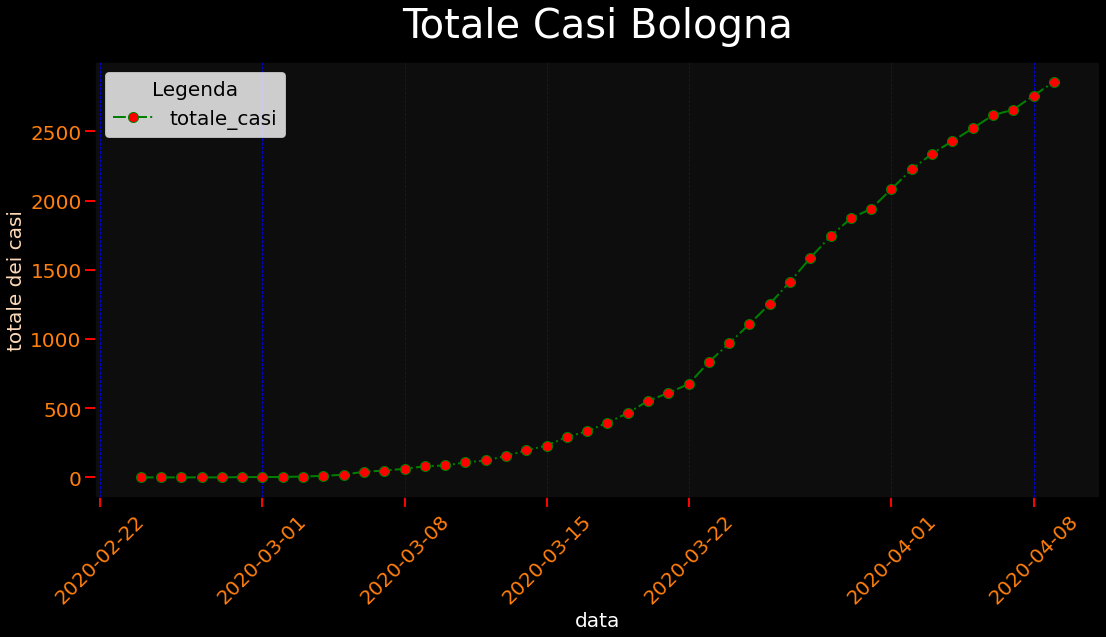

In [23]:
import matplotlib.pyplot as plt
# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# https://www.tutorialspoint.com/matplotlib/index.htm
# plt.style("fiverthirtyeight")

x = df_final["data"].values.tolist()
y = df_final["totale_casi"].values.tolist()

fig, ax = plt.subplots(figsize=(18,8),facecolor=(0, 0, 0))

ax.set_facecolor((0.05,0.05,0.05)) #or use hex values
ax.set_title('Totale Casi Bologna', color=(1,1,1), fontsize='40',pad=25)
ax.set_xlabel('data', color='w',fontsize='20')
ax.set_ylabel('totale dei casi', color='peachpuff',fontsize='20')
ax.tick_params(axis='x' ,direction='out', length=10, width=2, colors='r' ,labelcolor='tab:orange',labelsize=20,labelrotation=45)
ax.tick_params(axis='y' ,direction='out', length=10, width=2, colors='r',labelcolor='tab:orange',labelsize=20)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='b', linestyle='--')
plt.plot(x,y, marker='o', markerfacecolor='r', markersize=10, linestyle='-.', linewidth=2,color='green', label="totale_casi")
ax.legend(loc='best',fontsize=20, title="Legenda", title_fontsize=20)
plt.show()

#### Plotly

In [24]:
# Plotly doc
# Plotly offline figure show
# https://plotly.com/python/reference/

import plotly.graph_objects as go

xx = df_final["data"].values.tolist()
yy = df_final["totale_casi"].values.tolist()

fig = go.Figure()

fig.add_trace(go.Scatter(
        x = xx,
        y = yy,
        name="Totale Casi",
        mode="lines+markers",
        showlegend=True,
        marker=dict(
            symbol="circle-dot",
            size=6,
        ),
        line=dict(
            width=1,
            color="rgb(0,255,0)",
            dash="longdashdot"
        )
    )
)
fig.update_layout(
    title=dict(
        text ="Totale Casi Bologna",
        y = 0.9,
        x = 0.5,
        xanchor = "center",
        yanchor = "top",
    ),
    legend=dict(
        y = 0.9,
        x = 0.03,
    ),
    xaxis_title="data",
    yaxis_title="totale casi",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="orange", #"#7f7f7f", 
    ),
    hovermode='x',  #['x', 'y', 'closest', False]
    plot_bgcolor = "rgb(10,10,10)",
    paper_bgcolor="rgb(0,0,0)"
)
fig.show()


#### Risoluzione con fuzioni 

['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania', 'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta", 'Veneto']
['Gorizia', 'Pordenone', 'Trieste', 'Udine']


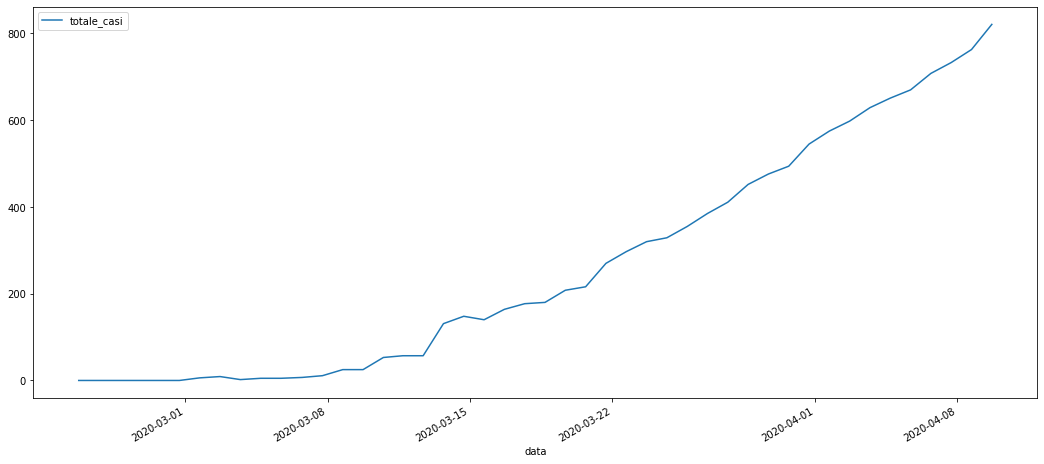

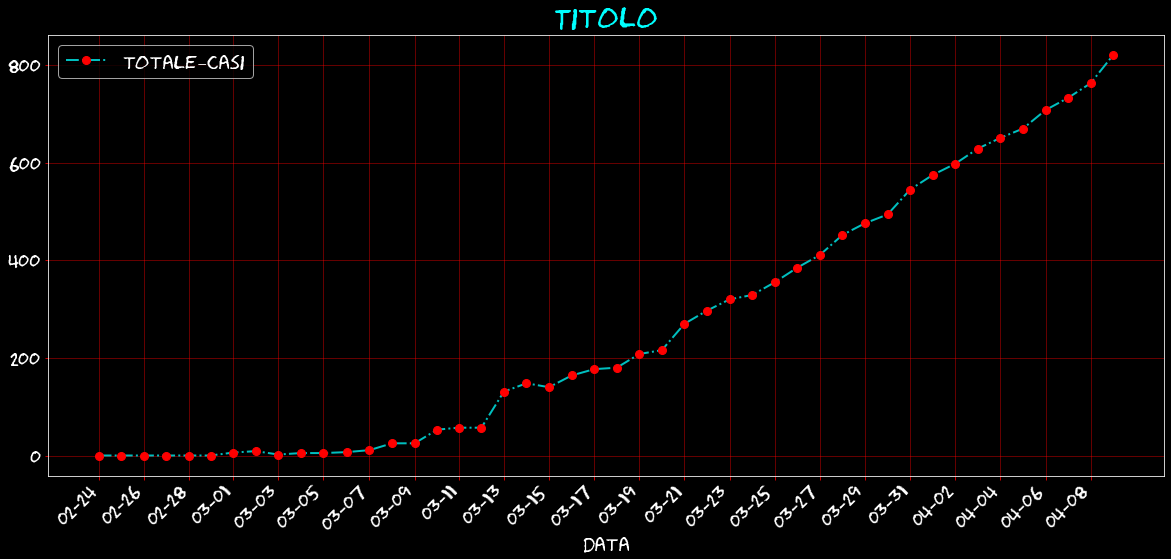

In [25]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import os 

def get_nomi_regioni(df):
  return list(df["denominazione_regione"].unique())

def get_nomi_province(df,regione):
    a = df[df["denominazione_regione"]==regione]
    #ultima_data = list(a.tail(1)["data"])[0]
    ultima_data = a.tail(1)["data"].values[0]
    res = list(a[a["data"]==ultima_data]["denominazione_provincia"])
    res.remove('In fase di definizione/aggiornamento')
    return res

def plot_andamento_provincia_style(df, provincia):
    new =  df[df["denominazione_provincia"]==provincia][["data","totale_casi"]]
    with plt.style.context('dark_background'):
        #df_final.plot(x="data", y="totale_casi",kind="line")
        plt.rcParams['lines.linewidth'] = 2
        plt.rcParams['lines.linestyle'] = '-.'
        plt.rc('lines', marker='o', markerfacecolor='r', markersize=8, markeredgecolor="r")
        #plt.rc('lines', linewidth=2, color='red',linestyle='-.')
        plt.rcParams['axes.prop_cycle'] = cycler(color=['c', 'g', 'b', 'y']) # color line
        plt.rcParams['figure.figsize'] = (20,9)
        plt.rc("axes",titlesize=30, titlecolor="cyan",titlepad=10)
        plt.rcParams.update({"axes.grid" : True, "grid.color": "red", "grid.alpha" : 0.5})
        plt.rc("font", family="fantasy", fantasy="Comic Neue", size=20)
        plt.rcParams["date.autoformatter.day"]= "%m-%d" #"%Y-%m"
        # Sample half element of a series
        xlist = []
        data_list = list(new['data'])
        for i in range(0, len(data_list),2):
            xlist.append(data_list[i])
        
        ax = new.set_index("data").plot(y="totale_casi",kind="line", title="Titolo", xticks=xlist)
        ax.tick_params(axis='x',labelrotation=45) #,labelcolor='orange',
        #ax.yaxis.grid(False)
        #write_image(ax.figure)
        return ax.figure

def write_image(fig):
    directory = "assets/images/"
    if not os.path.exists(directory):
        os.makedirs(directory)
    fig.savefig(directory+ "ex1.png")
    
def plot_andamento_provincia(df,provincia):
  new = df[df["denominazione_provincia"]==provincia][["data","totale_casi"]]
  ax = new.set_index("data").plot(kind="line", y="totale_casi", figsize=(18,8))
  return ax.figure

# Leggiamo i dati
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df["data"] = pd.to_datetime(df["data"])
df.head(2)

nomi_regioni = get_nomi_regioni(df)
print(nomi_regioni)

regione = "Friuli Venezia Giulia"
res = get_nomi_province(df,regione)
print(res)

provincia="Trieste"
fig = plot_andamento_provincia(df,provincia)
fig = plot_andamento_provincia_style(df,provincia)


### Parte 2. Comparare l'andamento nel tempo dei contagiati delle prime 3 provincie della nostra regione (Emilia-Romagna) con quelli  di una provincia appartenente sempre alla nostra regione.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



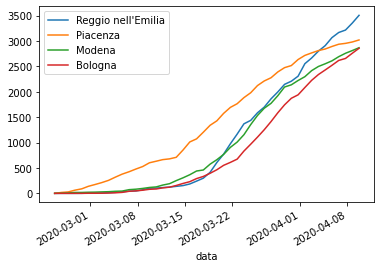

In [26]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

def plot_data_es2(df):
    # Update data for plot
    #fig, ax = subplots(1, 1, figsize=(18,8))
    df.plot(x="data",kind="line")#,ax=ax)

def get_nomi_regioni(df):
    nomi_regioni = list(df["denominazione_regione"].unique())
    nomi_regioni.sort()
    return nomi_regioni

def get_nomi_provincie(df, num, regione="Emilia-Romagna"):
    # Nomi delle prime num provincie per numero di casi 
    ultima_data_aggiornamento = list(df.tail(1)["data"])[0]
    # Dataframe regione scelta e ultima data aggiornamento
    temp = df[(df["denominazione_regione"]==regione) & (df["data"]==ultima_data_aggiornamento)]
    # Ordina dal più grande al più piccolo
    temp.sort_values(by="totale_casi",ascending=False, inplace=True)
    nomi_province = list(temp["denominazione_provincia"][0:num])

    # Nomi pronvicie 
    #nomi_province = list(df["denominazione_provincia"].unique())
    return nomi_province

def es2(df,provincia,regione):
    # Comparare l'andamento nel tempo dei contagiati di ogni provincia della nostra regione (Emilia-Romagna).
    nomi_province = get_nomi_provincie(df, 3, regione)  # Nomi delle prime N provincie per numero di casi 

    # Se la provincia che desidero compare non è tra le prime 3 l'aggiungo
    if provincia not in nomi_province:
        nomi_province.append(provincia)

    #print(nomi_province)
    df_fin_vec = []
    
    data_vec = df
    mydict = {}
    for nome_provincia in nomi_province:
        if nome_provincia!='In fase di definizione/aggiornamento':
            df_fin = df[ (df["denominazione_regione"]==regione) & (df["denominazione_provincia"]==nome_provincia)]
            mydict["data"] = list(df_fin["data"])
            mydict[nome_provincia] = list(df_fin["totale_casi"])

    df_fin = pd.DataFrame(mydict)
    df_fin["data"] = pd.to_datetime(df_fin["data"])
    #display(df_fin)
    plot_data_es2(df_fin)


df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
regione="Emilia-Romagna"
provincia="Bologna"
es2(df,provincia,regione)


### Parte 3. Creare un grafico a torta con le percentuali di contagiati per ogni provincia apparente alla nostra regione (Emilia-Romagna)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
5782,2020-04-09T17:00:00,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,2856,NaN,NaN
5783,2020-04-09T17:00:00,ITA,8,Emilia-Romagna,38,Ferrara,FE,44.835991,11.618689,563,NaN,NaN
5784,2020-04-09T17:00:00,ITA,8,Emilia-Romagna,40,Forlì-Cesena,FC,44.222686,12.040686,1081,NaN,NaN
5785,2020-04-09T17:00:00,ITA,8,Emilia-Romagna,36,Modena,MO,44.646000,10.926155,2867,NaN,NaN
5786,2020-04-09T17:00:00,ITA,8,Emilia-Romagna,34,Parma,PR,44.801074,10.328350,2421,NaN,NaN
5787,2020-04-09T17:00:00,ITA,8,Emilia-Romagna,33,Piacenza,PC,45.051935,9.692633,3020,NaN,NaN
5788,2020-04-09T17:00:00,ITA,8,Emilia-Romagna,39,Ravenna,RA,44.417225,12.199139,751,NaN,NaN
5789,2020-04-09T17:00:00,ITA,8,Emilia-Romagna,35,Reggio nell'Emilia,RE,44.697353,10.630080,3505,NaN,NaN
5790,2020-04-09T17:00:00,ITA,8,Emilia-Romagna,99,Rimini,RN,44.060901,12.565630,1613,NaN,NaN


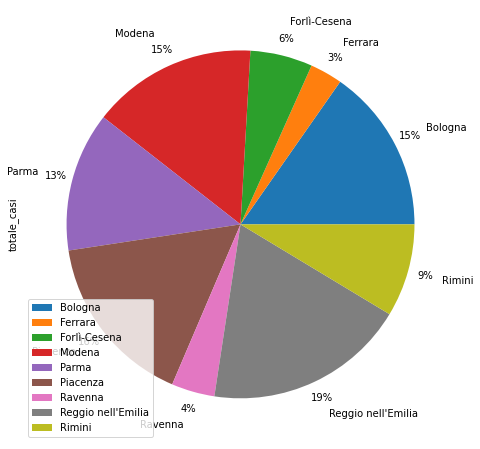

In [27]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt


regione="Emilia-Romagna"
provincia="Bologna"
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
ultima_data_aggiornamento = list(df.tail(1)["data"])[0]
df_choice = df[(df["denominazione_regione"]==regione) & (df["denominazione_provincia"]!='In fase di definizione/aggiornamento') & (df["data"]==ultima_data_aggiornamento) ]
display(df_choice)
cont = {
    'totale_casi': list(df_choice["totale_casi"])
    }
df_plot = pd.DataFrame(cont, index=list(df_choice["denominazione_provincia"]) )

fig, ax = plt.subplots(1, 1, figsize=(18,8))
df_plot.plot(kind="pie", y="totale_casi",ax=ax,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
#fig.savefig("covid19.png")    

### Visualizza i risultati in una pagina web usando (Dash Plotly)

['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania', 'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta", 'Veneto']
['Bologna', 'Ferrara', 'Forlì-Cesena', 'Modena', 'Parma', 'Piacenza', 'Ravenna', "Reggio nell'Emilia", 'Rimini']


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
5782,2020-04-09 17:00:00,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,2856,NaN,NaN
5783,2020-04-09 17:00:00,ITA,8,Emilia-Romagna,38,Ferrara,FE,44.835991,11.618689,563,NaN,NaN
5784,2020-04-09 17:00:00,ITA,8,Emilia-Romagna,40,Forlì-Cesena,FC,44.222686,12.040686,1081,NaN,NaN
5785,2020-04-09 17:00:00,ITA,8,Emilia-Romagna,36,Modena,MO,44.646000,10.926155,2867,NaN,NaN
5786,2020-04-09 17:00:00,ITA,8,Emilia-Romagna,34,Parma,PR,44.801074,10.328350,2421,NaN,NaN
5787,2020-04-09 17:00:00,ITA,8,Emilia-Romagna,33,Piacenza,PC,45.051935,9.692633,3020,NaN,NaN
5788,2020-04-09 17:00:00,ITA,8,Emilia-Romagna,39,Ravenna,RA,44.417225,12.199139,751,NaN,NaN
5789,2020-04-09 17:00:00,ITA,8,Emilia-Romagna,35,Reggio nell'Emilia,RE,44.697353,10.630080,3505,NaN,NaN
5790,2020-04-09 17:00:00,ITA,8,Emilia-Romagna,99,Rimini,RN,44.060901,12.565630,1613,NaN,NaN


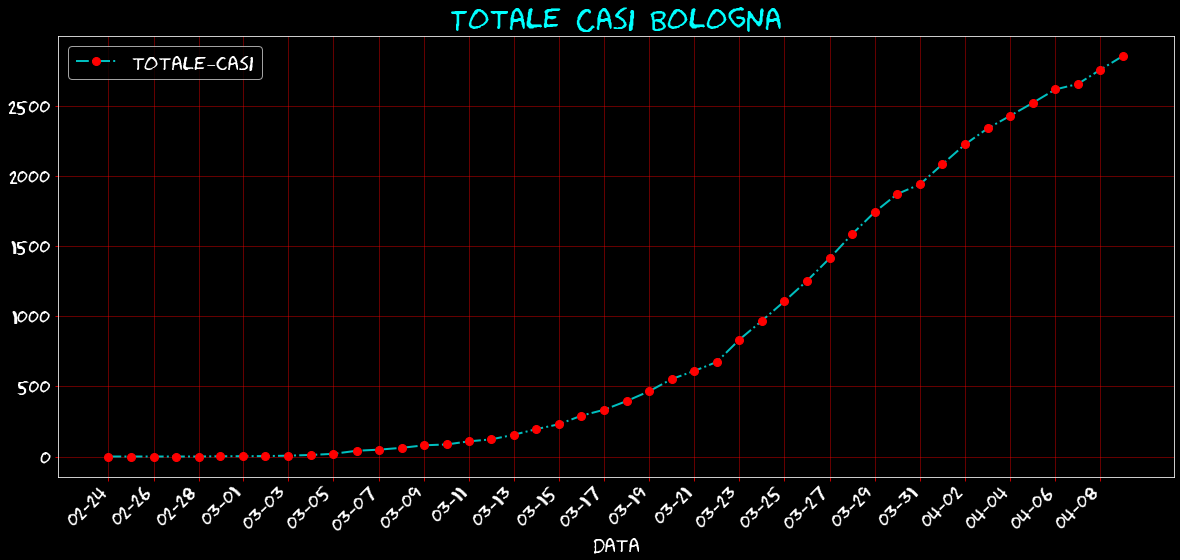

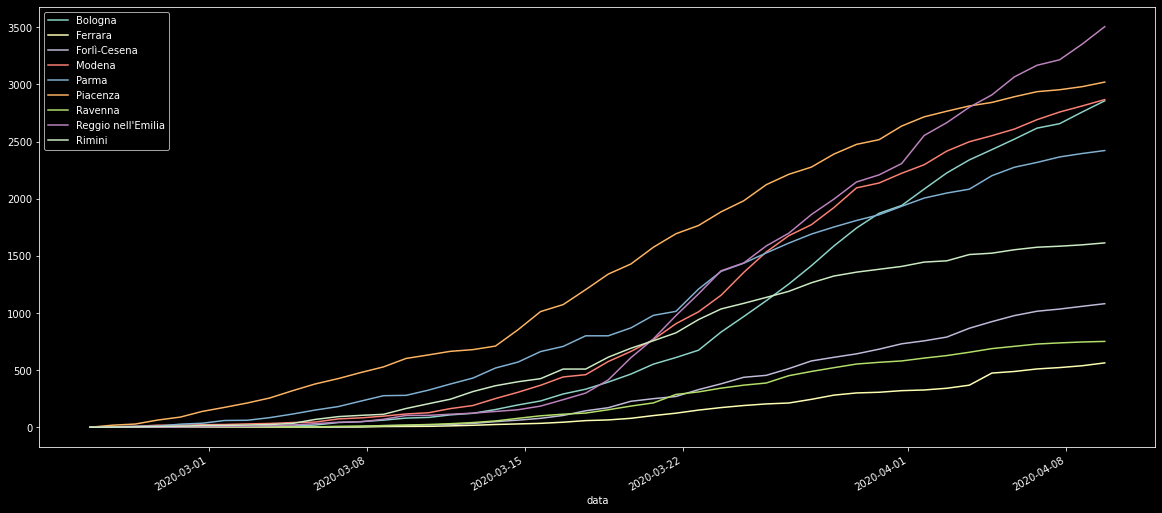

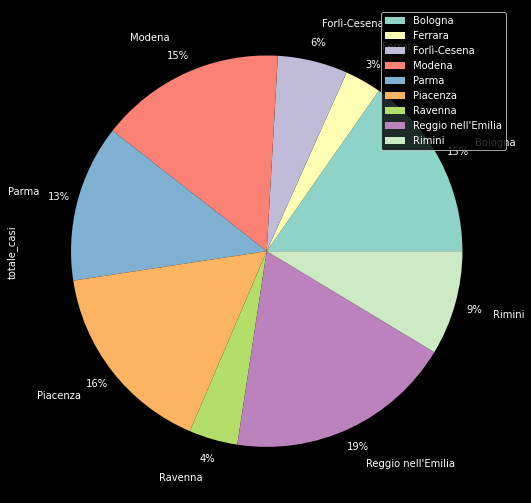

In [30]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import os 

def get_nomi_regioni(df):
  return list(df["denominazione_regione"].unique())

def get_nomi_province(df,regione):
    a = df[df["denominazione_regione"]==regione]
    #ultima_data = list(a.tail(1)["data"])[0]
    ultima_data = a.tail(1)["data"].values[0]
    res = list(a[a["data"]==ultima_data]["denominazione_provincia"])
    res.remove('In fase di definizione/aggiornamento')
    return res

def plot_andamento_pie(df, regione):
    ultima_data_aggiornamento = list(df.tail(1)["data"])[0]
    df_choice = df[(df["denominazione_regione"]==regione) & (df["denominazione_provincia"]!='In fase di definizione/aggiornamento') & (df["data"]==ultima_data_aggiornamento) ]
    display(df_choice)
    cont = {
        'totale_casi': list(df_choice["totale_casi"])
        }
    df_plot = pd.DataFrame(cont, index=list(df_choice["denominazione_provincia"]) )

    with plt.style.context('dark_background'):
        ax = df_plot.plot(kind="pie", y="totale_casi",autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, figsize=(20,9))
        return ax.figure

def plot_andamento_provincia_style(df, provincia):
    new =  df[df["denominazione_provincia"]==provincia][["data","totale_casi"]]
    with plt.style.context('dark_background'):
        #df_final.plot(x="data", y="totale_casi",kind="line")
        plt.rcParams['lines.linewidth'] = 2
        plt.rcParams['lines.linestyle'] = '-.'
        plt.rc('lines', marker='o', markerfacecolor='r', markersize=8, markeredgecolor="r")
        #plt.rc('lines', linewidth=2, color='red',linestyle='-.')
        plt.rcParams['axes.prop_cycle'] = cycler(color=['c', 'g', 'b', 'y']) # color line
        plt.rcParams['figure.figsize'] = (20,9)
        plt.rc("axes",titlesize=30, titlecolor="cyan",titlepad=10)
        plt.rcParams.update({"axes.grid" : True, "grid.color": "red", "grid.alpha" : 0.5})
        plt.rc("font", family="fantasy", fantasy="Comic Neue", size=20)
        plt.rcParams["date.autoformatter.day"]= "%m-%d" #"%Y-%m"
        # Sample half element of a series
        xlist = []
        data_list = list(new['data'])
        for i in range(0, len(data_list),2):
            xlist.append(data_list[i])
        
        ax = new.set_index("data").plot(y="totale_casi",kind="line", title="Totale Casi " + provincia, xticks=xlist)
        ax.tick_params(axis='x',labelrotation=45) #,labelcolor='orange',
        #ax.yaxis.grid(False)
        #write_image(ax.figure)
        return ax.figure

def plot_andamento_province(df, regione):
    # Comparare l'andamento nel tempo dei contagiati di ogni provincia della nostra regione (Emilia-Romagna).
    nomi_province = get_nomi_province(df,regione)  # Nomi delle prime N provincie per numero di casi 

    #print(nomi_province)
    mydict = {}
    for nome_provincia in nomi_province:
        df_fin = df[df["denominazione_provincia"]==nome_provincia][["data","totale_casi"]]
        mydict["data"] = list(df_fin["data"])
        mydict[nome_provincia] = list(df_fin["totale_casi"])

    df_fin = pd.DataFrame(mydict)
    #display(df_fin)
    with plt.style.context('dark_background'):
        ax =df_fin.set_index("data").plot(kind="line", figsize=(20,9))
        return ax.figure

def write_image(fig, name):
    directory = "assets/images/"
    if not os.path.exists(directory):
        os.makedirs(directory)
    fig.savefig(directory+ name,transparent=True)
    
def plot_andamento_provincia(df,provincia):
  new = df[df["denominazione_provincia"]==provincia][["data","totale_casi"]]
  ax = new.set_index("data").plot(kind="line", y="totale_casi", figsize=(20,9))
  return ax.figure

# Leggiamo i dati
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df["data"] = pd.to_datetime(df["data"])
df.head(2)

nomi_regioni = get_nomi_regioni(df)
print(nomi_regioni)

regione = "Emilia-Romagna"
res = get_nomi_province(df,regione)
print(res)

provincia="Bologna"
#fig = plot_andamento_provincia(df,provincia)        ## Parte 1
fig1 = plot_andamento_provincia_style(df,provincia)  ## Parte 1
fig2= plot_andamento_province(df, regione)          ## Parte 2
fig3 = plot_andamento_pie(df, regione)          ## Parte 3
write_image(fig1, "fig1.png")
write_image(fig2, "fig2.png")
write_image(fig3, "fig3.png")


In [31]:
!pip install dash flask_ngrok

     |████████████████████████████████| 71kB 1.1MB/s 
     |████████████████████████████████| 1.1MB 3.5MB/s 
     |████████████████████████████████| 3.4MB 14.4MB/s 
     |████████████████████████████████| 194kB 31.8MB/s 
     |████████████████████████████████| 1.8MB 26.2MB/s 
  Created wheel for dash: filename=dash-1.10.0-cp36-none-any.whl size=71321 sha256=7ec3124f9012e4c0ce4963950f048a2eb05e80b0718256ce53e4101d2202adea
  Stored in directory: /root/.cache/pip/wheels/96/99/b7/dd0abccbf36509041224628ed0f3ea1f82c59100437eb71370
  Created wheel for flask-compress: filename=Flask_Compress-1.4.0-cp36-none-any.whl size=3712 sha256=dbf310a128347bb72863693245606462166cb35846f352e0a4a7244f91b9a967
  Stored in directory: /root/.cache/pip/wheels/96/32/88/a1f6d9dd3c29570ab3a8acc0d556b3b20abcf3c623c868ce0a
  Created wheel for dash-renderer: filename=dash_renderer-1.3.0-cp36-none-any.whl size=1145100 sha256=ff05df1e70f12136e5a167fcc5941e693b0230c4bb98d198ef8c37edb445e279
  Stored in directory: /root

In [32]:
%%writefile assets/typography.css
body {
    padding: 20px 300px 0px 300px;
    margin : 0px 0px 0px  0px;
    /*padding : 0px 0px 0px 0px;*/
    background-color: black;
}

Writing assets/typography.css


In [33]:
import dash
import dash_html_components as html
from flask_ngrok import run_with_ngrok

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server
run_with_ngrok(server) 

app.layout = html.Div([
        html.Div(
        [   
            html.Img(src='/assets/images/fig1.png'),
        ]),
        html.Div(
        [   
            html.Img(src='/assets/images/fig2.png'),
        ]),
        html.Div(
        [   
            html.Img(src='/assets/images/fig3.png'),
        ])
    ],style={'backgroundColor': "rgb(0,0,0)",  "margin": "0", "padding": "0"})

if __name__ == '__main__':
    server.run()
    #app.run_server() #debug=True, host="0.0.0.0", port=8900)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://4ef1b650.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [09/Apr/2020 19:34:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:34:58] "GET /assets/typography.css?m=1586460888.1107323 HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:34:58] "GET /_dash-component-suites/dash_renderer/react@16.v1_3_0m1586460880.13.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:34:58] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_3_0m1586460880.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:34:59] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_0_3m1586460882.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:34:59] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_3_0m1586460880.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:34:59] "GET /_dash-component-suites/dash_renderer/dash_renderer.v1_3_0m1586460880.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2020 19:34:59] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_3_0m1586460880.13.0.min.js HTTP/1.1" 200 -
127.0